# Clements_2D Sample Run

Sampling of model runs for the low precipitation year, 1985.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Cover: path to Clements directory + "/output/land_cover/new_clm_files/cropland_veg_mosaic/drv_vegm.dat"

Forcing: Variable, made in-place

Hydraulic Conductivity: WSS Uniform, *k = 0.2*

Geological Profile: Bowen's Road in Broomes Island Quadrant

Forcing Keys:
> **OG**: original <br/>
> **TLE**: low emissions temperature projection <br/>
> **THE**: high emissions temperature projection <br/>
> **MS**: many storms <br/>
> **FS**: few storms <br/>
> **SLR1**: 2100 Sea Level Rise Preciction for SSP1-1.9 <br/>
> **SLR2**: 2100 Sea Level Rise Preciction for SSP2-4.5 <br/>
> **SLR5**: 2100 Sea Level Rise Preciction for SSP5-8.5 <br/>

In [1]:
# Import the ParFlow packages

import parflow as pf
from parflow import Run
from parflow.tools.io import write_pfb, read_pfb
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
import parflow.tools.hydrology as hydro
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from glob import glob

# Single Parameter Runs

This section runs the forcing parameters on their own, saving the runs in a folder with the run key name. We also create forcing files as needed, saving them to the folder with the associated run key name.

## OG

In [3]:
#-----------------------------------------------------------------------------
# Setting Initial Parameters
#-----------------------------------------------------------------------------
os.chdir("/home/lrgrant/ParFlow/Clements_2D")
# print(os.getcwd())

#relative_path_to_runfolder = 'output_wb'
base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/OG'
# print(base)

# Set our Run Name 
PFCLM_1985_OG = Run("PFCLM_1985_OG")

stopt = 8760 ## run only for all hours of the year

#-----------------------------------------------------------------------------
# Copying Input Files into Run Directory
#-----------------------------------------------------------------------------

# locate necessary input files
input_file_clmin = os.getcwd() + "/forcing/forcing_1985/drv_clmin.dat"
input_file_vegp = os.getcwd() + "/forcing/forcing_1985/drv_vegp.dat"
input_file_vegm = os.getcwd() + "/output/land_cover/new_clm_files/cropland_veg_mosaic/drv_vegm.dat"

# define where we want input files to go (in working directory)
output_clmin = os.getcwd() + "/output/output_1985/OG/drv_clmin.dat"
output_vegp = os.getcwd() + "/output/output_1985/OG/drv_vegp.dat"
output_vegm = os.getcwd() + "/output/output_1985/OG/drv_vegm.dat"

# Copy CLM Inputs into working directory
shutil.copyfile(input_file_clmin, output_clmin)
shutil.copyfile(input_file_vegp, output_vegp)
shutil.copyfile(input_file_vegm, output_vegm)

#-----------------------------------------------------------------------------
# Set Directory
#-----------------------------------------------------------------------------

os.chdir(base + "/../..")
# print(os.getcwd())

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
PFCLM_1985_OG.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

PFCLM_1985_OG.Process.Topology.P = 1
PFCLM_1985_OG.Process.Topology.Q = 1
PFCLM_1985_OG.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
PFCLM_1985_OG.ComputationalGrid.Lower.X = 0.0
PFCLM_1985_OG.ComputationalGrid.Lower.Y = 0.0
PFCLM_1985_OG.ComputationalGrid.Lower.Z = 0.0

PFCLM_1985_OG.ComputationalGrid.DX      = 100.0
PFCLM_1985_OG.ComputationalGrid.DY      = 2.0
PFCLM_1985_OG.ComputationalGrid.DZ      = 1.0

PFCLM_1985_OG.ComputationalGrid.NX      = 20
PFCLM_1985_OG.ComputationalGrid.NY      = 1
PFCLM_1985_OG.ComputationalGrid.NZ      = 8

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
PFCLM_1985_OG.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
PFCLM_1985_OG.GeomInput.domain_input.InputType = 'Box'
PFCLM_1985_OG.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Geom.domain.Lower.X = 0.0
PFCLM_1985_OG.Geom.domain.Lower.Y = 0.0
PFCLM_1985_OG.Geom.domain.Lower.Z = 0.0

PFCLM_1985_OG.Geom.domain.Upper.X = 2000.0
PFCLM_1985_OG.Geom.domain.Upper.Y = 2.0
PFCLM_1985_OG.Geom.domain.Upper.Z = 8.0

PFCLM_1985_OG.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

PFCLM_1985_OG.Solver.Nonlinear.VariableDz = True
PFCLM_1985_OG.dzScale.GeomNames           = 'domain'
PFCLM_1985_OG.dzScale.Type                = 'nzList'
PFCLM_1985_OG.dzScale.nzListNumber        = 8

# cells start at the bottom (0) and move up to the top
# domain is 75 m thick, root zone is down to 4 cells 
# so the root zone is 2 m thick   
PFCLM_1985_OG.Cell._0.dzScale.Value  = 18.0   
PFCLM_1985_OG.Cell._1.dzScale.Value  = 24.0
PFCLM_1985_OG.Cell._2.dzScale.Value  = 30.0
PFCLM_1985_OG.Cell._3.dzScale.Value  = 1.0    
PFCLM_1985_OG.Cell._4.dzScale.Value  = 1.0   # top of rooting zone - leaving unchanged
PFCLM_1985_OG.Cell._5.dzScale.Value  = 0.6   #0.6* 1.0 = 0.6  60 cm 3rd layer
PFCLM_1985_OG.Cell._6.dzScale.Value  = 0.3   #0.3* 1.0 = 0.3  30 cm 2nd layer
PFCLM_1985_OG.Cell._7.dzScale.Value  = 0.1   #0.1* 1.0 = 0.1  10 cm top layer

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Geom.Perm.Names              = 'domain'

PFCLM_1985_OG.Geom.domain.Perm.Type        = 'Constant'
PFCLM_1985_OG.Geom.domain.Perm.Value       = 0.2  # m/h

PFCLM_1985_OG.Perm.TensorType              = 'TensorByGeom'
PFCLM_1985_OG.Geom.Perm.TensorByGeom.Names = 'domain'
PFCLM_1985_OG.Geom.domain.Perm.TensorValX  = 1.0
PFCLM_1985_OG.Geom.domain.Perm.TensorValY  = 1.0
PFCLM_1985_OG.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

PFCLM_1985_OG.SpecificStorage.Type              = 'Constant'
PFCLM_1985_OG.SpecificStorage.GeomNames         = 'domain'
PFCLM_1985_OG.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

PFCLM_1985_OG.Phase.Names = 'water'

PFCLM_1985_OG.Phase.water.Density.Type     = 'Constant'
PFCLM_1985_OG.Phase.water.Density.Value    = 1.0

PFCLM_1985_OG.Phase.water.Viscosity.Type   = 'Constant'
PFCLM_1985_OG.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Contaminants.Names = ''

#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

PFCLM_1985_OG.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

PFCLM_1985_OG.TimingInfo.BaseUnit     = 1.0
PFCLM_1985_OG.TimingInfo.StartCount   = 0
PFCLM_1985_OG.TimingInfo.StartTime    = 0.0
PFCLM_1985_OG.TimingInfo.StopTime     = stopt
PFCLM_1985_OG.TimingInfo.DumpInterval = 1.0
PFCLM_1985_OG.TimeStep.Type           = 'Constant'
PFCLM_1985_OG.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

PFCLM_1985_OG.Geom.Porosity.GeomNames    = 'domain'

PFCLM_1985_OG.Geom.domain.Porosity.Type  = 'Constant'
PFCLM_1985_OG.Geom.domain.Porosity.Value = 0.25

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Phase.water.Mobility.Type  = 'Constant'
PFCLM_1985_OG.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

PFCLM_1985_OG.Phase.RelPerm.Type        = 'VanGenuchten'
PFCLM_1985_OG.Phase.RelPerm.GeomNames   = 'domain'

PFCLM_1985_OG.Geom.domain.RelPerm.Alpha = 2.0
PFCLM_1985_OG.Geom.domain.RelPerm.N     = 3.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

PFCLM_1985_OG.Phase.Saturation.Type        = 'VanGenuchten'
PFCLM_1985_OG.Phase.Saturation.GeomNames   = 'domain'

PFCLM_1985_OG.Geom.domain.Saturation.Alpha = 2.0
PFCLM_1985_OG.Geom.domain.Saturation.N     = 3.0
PFCLM_1985_OG.Geom.domain.Saturation.SRes  = 0.2
PFCLM_1985_OG.Geom.domain.Saturation.SSat  = 1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
PFCLM_1985_OG.Cycle.Names = 'constant'
PFCLM_1985_OG.Cycle.constant.Names = 'alltime'
PFCLM_1985_OG.Cycle.constant.alltime.Length = 1
PFCLM_1985_OG.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
PFCLM_1985_OG.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

PFCLM_1985_OG.Patch.y_lower.BCPressure.Type          = 'FluxConst'
PFCLM_1985_OG.Patch.y_lower.BCPressure.Cycle         = 'constant'
PFCLM_1985_OG.Patch.y_lower.BCPressure.alltime.Value = 0.0

PFCLM_1985_OG.Patch.z_lower.BCPressure.Type = 'FluxConst'
PFCLM_1985_OG.Patch.z_lower.BCPressure.Cycle         = 'constant'
PFCLM_1985_OG.Patch.z_lower.BCPressure.alltime.Value = 0.0

PFCLM_1985_OG.Patch.x_lower.BCPressure.Type          = 'FluxConst'
PFCLM_1985_OG.Patch.x_lower.BCPressure.Cycle         = 'constant'
PFCLM_1985_OG.Patch.x_lower.BCPressure.alltime.Value = 0.0

PFCLM_1985_OG.Patch.x_upper.BCPressure.Type          = 'DirEquilRefPatch'
PFCLM_1985_OG.Patch.x_upper.BCPressure.RefGeom       = 'domain'
PFCLM_1985_OG.Patch.x_upper.BCPressure.RefPatch      = 'z_upper'
PFCLM_1985_OG.Patch.x_upper.BCPressure.Cycle         = 'constant'
PFCLM_1985_OG.Patch.x_upper.BCPressure.alltime.Value = -2.0  # ocean boundary is 2m below land surface

PFCLM_1985_OG.Patch.y_upper.BCPressure.Type          = 'FluxConst'
PFCLM_1985_OG.Patch.y_upper.BCPressure.Cycle         = 'constant'
PFCLM_1985_OG.Patch.y_upper.BCPressure.alltime.Value = 0.0

PFCLM_1985_OG.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
PFCLM_1985_OG.Patch.z_upper.BCPressure.Cycle         = 'constant'
PFCLM_1985_OG.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

PFCLM_1985_OG.TopoSlopesX.Type              = 'Constant'
PFCLM_1985_OG.TopoSlopesX.GeomNames         = 'domain'
PFCLM_1985_OG.TopoSlopesX.Geom.domain.Value = -0.1  #slope in X-direction to allow ponded water to run off

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

PFCLM_1985_OG.TopoSlopesY.Type              = 'Constant'
PFCLM_1985_OG.TopoSlopesY.GeomNames         = 'domain'
PFCLM_1985_OG.TopoSlopesY.Geom.domain.Value = 0.0

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

PFCLM_1985_OG.Mannings.Type               = 'Constant'
PFCLM_1985_OG.Mannings.GeomNames          = 'domain'
PFCLM_1985_OG.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

PFCLM_1985_OG.PhaseSources.water.Type              = 'Constant'
PFCLM_1985_OG.PhaseSources.water.GeomNames         = 'domain'
PFCLM_1985_OG.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

PFCLM_1985_OG.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

PFCLM_1985_OG.Solver         = 'Richards'
PFCLM_1985_OG.Solver.MaxIter = 9000

PFCLM_1985_OG.Solver.Nonlinear.MaxIter           = 100
PFCLM_1985_OG.Solver.Nonlinear.ResidualTol       = 1e-5
PFCLM_1985_OG.Solver.Nonlinear.EtaChoice         = 'Walker1'
PFCLM_1985_OG.Solver.Nonlinear.EtaValue          = 0.01
PFCLM_1985_OG.Solver.Nonlinear.UseJacobian       = True
PFCLM_1985_OG.Solver.Nonlinear.DerivativeEpsilon = 1e-12
PFCLM_1985_OG.Solver.Nonlinear.StepTol           = 1e-30
PFCLM_1985_OG.Solver.Nonlinear.Globalization     = 'LineSearch'
PFCLM_1985_OG.Solver.Linear.KrylovDimension      = 100
PFCLM_1985_OG.Solver.Linear.MaxRestarts          = 5
PFCLM_1985_OG.Solver.Linear.Preconditioner       = 'PFMG'
PFCLM_1985_OG.Solver.PrintSubsurf                = True
PFCLM_1985_OG.Solver.Drop                        = 1E-20
PFCLM_1985_OG.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True  #only PFB output for water balance example
#  PFB  no SILO
PFCLM_1985_OG.Solver.PrintSubsurfData         = write_pfb
PFCLM_1985_OG.Solver.PrintPressure            = write_pfb
PFCLM_1985_OG.Solver.PrintSaturation          = write_pfb
PFCLM_1985_OG.Solver.PrintCLM                 = write_pfb
PFCLM_1985_OG.Solver.PrintMask                = write_pfb
PFCLM_1985_OG.Solver.PrintSpecificStorage     = write_pfb
PFCLM_1985_OG.Solver.PrintEvapTrans           = write_pfb
PFCLM_1985_OG.Solver.PrintVelocities          = True 

PFCLM_1985_OG.Solver.WriteSiloMannings        = False
PFCLM_1985_OG.Solver.WriteSiloMask            = False
PFCLM_1985_OG.Solver.WriteSiloSlopes          = False
PFCLM_1985_OG.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#PFCLM_2D.NetCDF.NumStepsPerFile          = 240
PFCLM_1985_OG.NetCDF.WritePressure            = write_netcdf
PFCLM_1985_OG.NetCDF.WriteSubsurface          = False
PFCLM_1985_OG.NetCDF.WriteSaturation          = write_netcdf
PFCLM_1985_OG.NetCDF.WriteCLM                 = write_netcdf
#PFCLM_2D.NetCDF.CLMNumStepsPerFile       = 240


#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
PFCLM_1985_OG.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
PFCLM_1985_OG.Solver.CLM.MetForcing   = '1D'
PFCLM_1985_OG.Solver.CLM.MetFileName = 'forcing1D_1985.txt'
PFCLM_1985_OG.Solver.CLM.MetFilePath  = os.getcwd() + '/../forcing/forcing_1985'

# Set CLM Plant Water Use Parameters
PFCLM_1985_OG.Solver.CLM.EvapBeta       = 'Linear'
PFCLM_1985_OG.Solver.CLM.VegWaterStress = 'Saturation'
PFCLM_1985_OG.Solver.CLM.ResSat         = 0.2
PFCLM_1985_OG.Solver.CLM.WiltingPoint   = 0.2
PFCLM_1985_OG.Solver.CLM.FieldCapacity  = 1.00
PFCLM_1985_OG.Solver.CLM.IrrigationType = 'none'
PFCLM_1985_OG.Solver.CLM.RootZoneNZ     =  3   # layer used for seasonal Temp for LAI
PFCLM_1985_OG.Solver.CLM.SoiLayer       =  4   # root zone thickness, see above

#PFCLM_2D.Solver.CLM.UseSlopeAspect = True

#Writing output options for CLM
#  no SILO, no native CLM logs
PFCLM_1985_OG.Solver.PrintLSMSink        = False
PFCLM_1985_OG.Solver.CLM.CLMDumpInterval = 1
PFCLM_1985_OG.Solver.CLM.CLMFileDir      = 'output/'
PFCLM_1985_OG.Solver.CLM.BinaryOutDir    = False
PFCLM_1985_OG.Solver.CLM.IstepStart      = 1
PFCLM_1985_OG.Solver.WriteCLMBinary      = False
PFCLM_1985_OG.Solver.WriteSiloCLM        = False
PFCLM_1985_OG.Solver.CLM.WriteLogs       = False
PFCLM_1985_OG.Solver.CLM.WriteLastRST    = True
PFCLM_1985_OG.Solver.CLM.DailyRST        = False
PFCLM_1985_OG.Solver.CLM.SingleFile      = True


#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

PFCLM_1985_OG.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_1985_OG.ICPressure.GeomNames            = 'domain'
PFCLM_1985_OG.Geom.domain.ICPressure.Value    = -2.00
PFCLM_1985_OG.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_1985_OG.Geom.domain.ICPressure.RefPatch = 'z_upper'

/home/lrgrant/ParFlow/Clements_2D/output


In [4]:
# run the model
PFCLM_1985_OG.run(working_directory=base)


# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/OG
# ParFlow database
#  - PFCLM_1985_OG.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [5]:
#---------------------------------------------------
# Re-Running Model After Equilibration
#---------------------------------------------------
os.chdir(base)
run = Run.from_definition('PFCLM_1985_OG.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nt = len(data.times)  # get the number of time steps
nx = data.shape[2]    # get the number of cells in the x direction
ny = data.shape[1]    # get the number of cells in the y direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dy = data.dy          # get the cell size in the y direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# loading grid
nrows = nz
ncols = nx
# print(nrows, ncols)

# loading pressure field to re-initialize at final pressure conditions of the prior run
# i.e. running at "equilibrium conditions"
pressure_end = read_pfb(get_absolute_path('PFCLM_1985_OG.out.press.08760.pfb')).reshape(nrows, ncols)

# rearrange pressure field into a 3D array
pressure_end_new = np.ones((nrows, ny, ncols))
for i in range(nrows):
    pressure_end_new[[i]] = pressure_end[i,:]

# re-import write_pfb function so that the function runs and doesn't try to call boolean assigned before:
from parflow.tools.io import write_pfb

# write the new initial conditions into a file:
write_pfb(get_absolute_path('PF_PressIC.pfb'), pressure_end_new)

# we will change the "initial condition pressure" value to be the end value from the previous run
PFCLM_1985_OG.ICPressure.Type                 = 'PFBFile'
PFCLM_1985_OG.Geom.domain.ICPressure.FileName = 'PF_PressIC.pfb'

# we will now run the model again
PFCLM_1985_OG.run(working_directory=base)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/OG
# ParFlow database
#  - PFCLM_1985_OG.pfidb
# ==============================================================================




/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



## TLE

In [8]:
#-----------------------------------------------------------------------------
# Creating Forcing File
#-----------------------------------------------------------------------------
# load original 1985 forcing file
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1985")
file = 'forcing1D_1985.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]
# print(forcing_df.head())

# add 1.5 C to the temperature
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 1.5

# write to a file
os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/TLE')
forcing_df.to_csv('forcing1D_1985_TLE.txt',sep=' ',header=None, index=False, index_label=False)

Run as above.

## THE

In [195]:
#-----------------------------------------------------------------------------
# Creating Forcing File
#-----------------------------------------------------------------------------
# load the original 1985 forcing file
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1985")
file = 'forcing1D_1985.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we add 4 C to the temperature
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 4

# write to a file
os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/THE')
forcing_df.to_csv('forcing1D_1985_THE.txt',sep=' ',header=None, index=False, index_label=False)

291.2885770719345


Run as above.

## MS

In [20]:
#-----------------------------------------------------------------------------
# Creating Forcing File
#-----------------------------------------------------------------------------

# load the forcing file for the MS year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_2002")
file = 'forcing1D_2002.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as 1985-OG
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 881.5/1408.8

# write to a file
os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/MS')
forcing_df.to_csv('forcing1D_1985_MS.txt',sep=' ',header=None, index=False, index_label=False)

Run as above.

## FS

In [26]:
#-----------------------------------------------------------------------------
# Creating Forcing File
#-----------------------------------------------------------------------------

# load the forcing file for FS year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1994")
file = 'forcing1D_1994.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as 1985-OG
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 881.5/758.2

# write to a file
os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/FS')
forcing_df.to_csv('forcing1D_1985_FS.txt',sep=' ',header=None, index=False, index_label=False)

Run as above.

## HP

In [10]:
#-----------------------------------------------------------------------------
# Creating Forcing File
#-----------------------------------------------------------------------------

# load the forcing file for 1985
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1985")
file = 'forcing1D_1985.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as the HP year
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 1337/881.5

# # write to a file
os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/HP')
forcing_df.to_csv('forcing1D_1985_HP.txt',sep=' ',header=None, index=False, index_label=False)

Run as above.

## SLR1

Run as above with OG forcing file. Set sea level condition as: `PFCLM_1985_SLR5.Patch.x_upper.BCPressure.alltime.Value = -2 + 1.08 # m` and run in folder `/home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR1`

## SLR2

SLR2 is run by copying and altering the SLR1 model.

In [32]:
#-----------------------------------------------------------------------------
# Set Base, Directory
#-----------------------------------------------------------------------------

base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR2'

os.chdir(base + "/../../../") # puts us at clements_2d

#-----------------------------------------------------------------------------
# Copying Input Files into Run Directory
#-----------------------------------------------------------------------------

input_file_clmin = os.getcwd() + "/forcing/forcing_1985/drv_clmin.dat"
input_file_vegp = os.getcwd() + "/forcing/forcing_1985/drv_vegp.dat"
input_file_vegm = os.getcwd() + "/output/land_cover/new_clm_files/cropland_veg_mosaic/drv_vegm.dat"
input_file_pressIC = os.getcwd() + "/output/output_1985/SLR1/PF_PressIC.pfb"
# be sure to change to correct output folder
output_clmin = os.getcwd() + "/output/output_1985/SLR2/drv_clmin.dat"
output_vegp = os.getcwd() + "/output/output_1985/SLR2/drv_vegp.dat"
output_vegm = os.getcwd() + "/output/output_1985/SLR2/drv_vegm.dat"
output_pressIC = os.getcwd() + "/output/output_1985/SLR2/PF_PressIC.pfb"

# CLM Inputs
shutil.copyfile(input_file_clmin, output_clmin)
shutil.copyfile(input_file_vegp, output_vegp)
shutil.copyfile(input_file_vegm, output_vegm)
shutil.copyfile(input_file_pressIC, output_pressIC)

'/home/lrgrant/ParFlow/Clements_2D/output/fucked_upedness/PF_PressIC.pfb'

In [35]:
#-----------------------------------------------------------------------------
# Loading SLR1 Model
#-----------------------------------------------------------------------------

os.chdir(base + "/../output_2001/SLR1")
PFCLM_1985_SLR1 = Run.from_definition("PFCLM_2001_SLR1.pfidb")
PFCLM_1985_SLR2 = deepcopy(PFCLM_1985_SLR1)

#-----------------------------------------------------------------------------
# Pressure Initial Conditions
#-----------------------------------------------------------------------------

# reverting Pressure IC to Original Types/Values
PFCLM_1985_SLR2.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_1985_SLR2.ICPressure.GeomNames            = 'domain'
PFCLM_1985_SLR2.Geom.domain.ICPressure.Value    = -2.00  # pressure at 8760 step of previous run, same WY
PFCLM_1985_SLR2.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_1985_SLR2.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Forcing Sea Level
#-----------------------------------------------------------------------------

# changing SLR condition to SLR2
PFCLM_1985_SLR2.Patch.x_upper.BCPressure.alltime.Value = -2.0 + 0.87 # m

#-----------------------------------------------------------------------------
# Run
#-----------------------------------------------------------------------------

# # running model with new SLR condition
PFCLM_1985_SLR2.run(working_directory=base)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
/home/lrgrant/ParFlow/Clements_2D/output/fucked_upedness

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/fucked_upedness
# ParFlow database
#  - PFCLM_2001_SLR1.pfidb
# ==============================================================================



/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)



# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [48]:
#-----------------------------------------------------------------------------
# Rename Run Files
#-----------------------------------------------------------------------------

''' All files saved with old prefix: PFCLM_1985_SLR1 '''

# Change to the base directory
os.chdir(base)

# Specify the old and new file name prefixes
old_prefix = "PFCLM_1985_SLR1"
new_prefix = "PFCLM_1985_SLR2"

# # Iterate over matching files with different extensions
for extension in ["out.*.pfb", "out.*.pfb.dist", "out.txt", "out.log", "out.kinsol.log", "out.*.csv", "out.pfmetadata", "out.pftcl"]:
    # Find matching files
    old_files = glob(f"{old_prefix}.{extension}")
    
# Rename each file
for old_file in old_files:
    # Construct new filename
    new_file = old_file.replace(old_prefix, new_prefix)
    
    # Rename the file
    os.rename(old_file, new_file)

# Specify old and new pfidb names
old_filename = "PFCLM_1985_SLR1.pfidb"
new_filename = "PFCLM_1985_SLR2.pfidb"

# Rename the pfidb file
os.rename(old_filename, new_filename)

In [49]:
#-----------------------------------------------------------------------------
# Re-running Equilibrated Model
#-----------------------------------------------------------------------------
os.chdir(base)
run = Run.from_definition('PFCLM_1985_SLR2.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nt = len(data.times)  # get the number of time steps
nx = data.shape[2]    # get the number of cells in the x direction
ny = data.shape[1]    # get the number of cells in the y direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dy = data.dy          # get the cell size in the y direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# loading grid
nrows = nz
ncols = nx
# print(nrows, ncols)

# load pressure field for last time step
pressure_end = read_pfb(get_absolute_path('PFCLM_1985_SLR2.out.press.08760.pfb')).reshape(nrows, ncols)

# rearrange pressure field into a 3D array
pressure_end_new = np.ones((nrows, ny, ncols))
for i in range(nrows):
    pressure_end_new[[i]] = pressure_end[i,:]

# re-import write_pfb function so that the function runs and doesn't try to call boolean assigned before:
from parflow.tools.io import write_pfb

# write the new initial conditions into a file:
write_pfb(get_absolute_path('PF_PressIC.pfb'), pressure_end_new)

# we will change the "initial condition pressure" value to be the end value from the previous run
PFCLM_1985_SLR2.ICPressure.Type                 = 'PFBFile'
PFCLM_1985_SLR2.Geom.domain.ICPressure.FileName = 'PF_PressIC.pfb'

# we will now run the model again
PFCLM_1985_SLR2.run(working_directory=base)


# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR2
# ParFlow database
#  - PFCLM_1985_SLR1.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [50]:
#-----------------------------------------------------------------------------
# Rename Run Files
#-----------------------------------------------------------------------------

# Change to the base directory
os.chdir(base)

# Specify the old and new file name prefixes
old_prefix = "PFCLM_1985_SLR1"
new_prefix = "PFCLM_1985_SLR2"

# # Iterate over matching files with different extensions
# "out.velx.*.pfb", "out.velx.*.pfb.dist","out.velz.*.pfb", "out.velz.*.pfb.dist", "out.satur.*.pfb", "out.satur.*.pfb.dist","out.vely.*.pfb", "out.vely.*.pfb.dist", "out.evaptrans.*.pfb", "out.evaptrans.*.pfb.dist", "out.press.*.pfb", "out.press.*.pfb.dist", 
for extension in ["out.*.pfb", "out.*.pfb.dist", "out.txt", "out.log", "out.kinsol.log", "out.*.csv", "out.pfmetadata", "out.pftcl"]:
    # Find matching files
    old_files = glob(f"{old_prefix}.{extension}")
    
# Rename each file
for old_file in old_files:
    # Construct new filename
    new_file = old_file.replace(old_prefix, new_prefix)
    
    # Rename the file
    os.rename(old_file, new_file)

old_filename = "PFCLM_1985_SLR1.pfidb"
new_filename = "PFCLM_1985_SLR2.pfidb"

# Rename the file
os.rename(old_filename, new_filename)

## SLR5

Runs as SLR2, with the sea level condition: `PFCLM_1985_SLR5.Patch.x_upper.BCPressure.alltime.Value = -2 + 1.08 # m`, and placed into the folder `/home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR5`.

# Preliminary Interpretation for Single Parameters

### Comparing Time Series

In [3]:
extension = ["OG", "HP", "MS", "FS", "TLE", "THE", "SLR1", "SLR2", "SLR5"]

plot_flux = {}

for ext in extension:
    os.chdir(base + ext)
    print(os.getcwd())
    
    # get a list of all the velocity files in order
    Vx_files = sorted(glob(f"PFCLM_1985_{ext}.out.velx.*.pfb"))
    
    # read in all pressure files into a 3D NParray
    Vx_arrays = pf.read_pfb_sequence(Vx_files)
    # #average over the grab velocity at coastal boundary
    Vx = Vx_arrays[:,:,0,-1]

    flux = (Vx*dz)   # per unit width
    # print(flux.shape)

    plot_flux[f'{ext}'] = np.sum(flux, axis=1)
    # print(plot_flux.shape)

/home/lrgrant/ParFlow/Clements_2D/output/output_1985/OG
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/HP
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/MS
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/FS
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/TLE
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/THE
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR1
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR2
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/SLR5


OG 0.024206422269618538
HP 0.03525819095504376
MS 0.03189494584078955
FS 0.022926858378494067
TLE 0.02335147942938244
THE 0.022521848606102304
SLR1 0.004172094651407481
SLR2 -0.0022589884398245747
SLR5 -0.01095508907662841


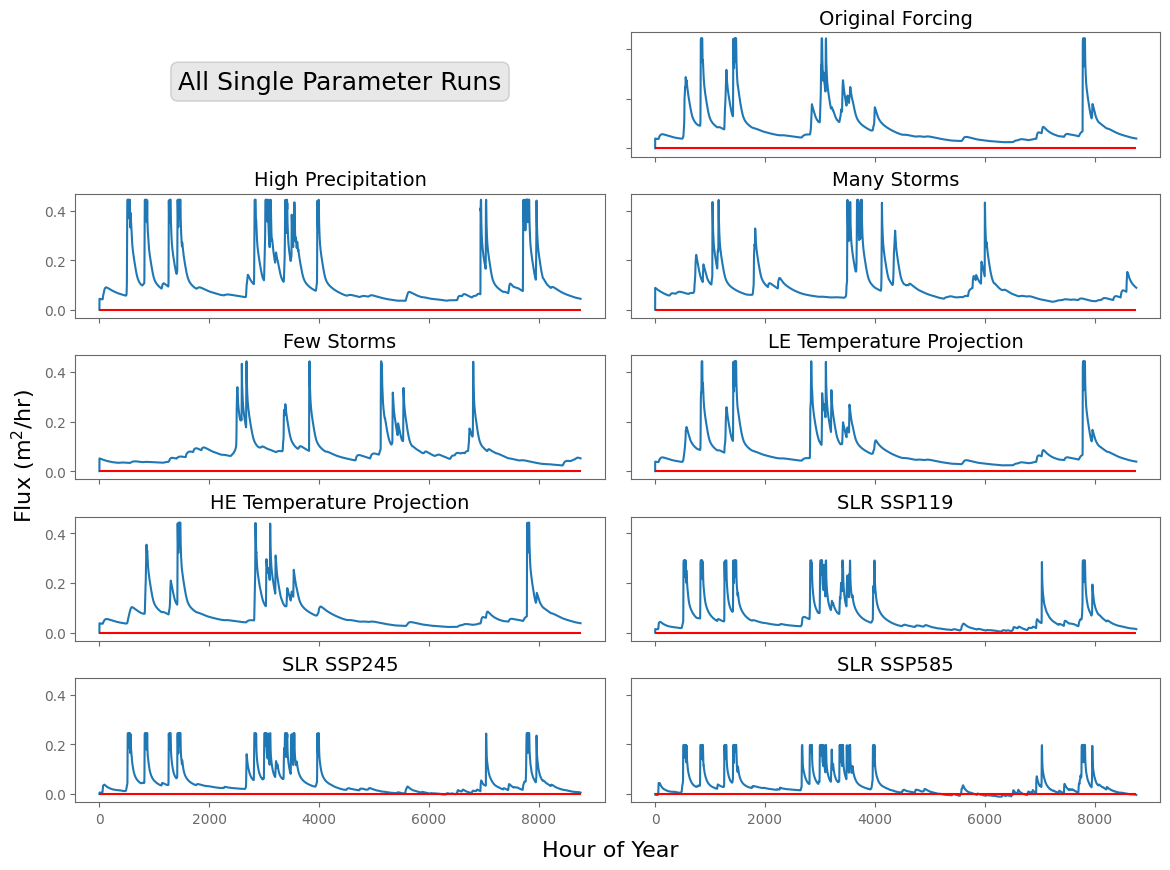

In [80]:
fig, ax = plt.subplots(5,2, figsize=(14, 10), sharey = True, sharex = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.3)

ax[0,1].plot(plot_flux['OG'])
ax[0,1].set_title("Original Forcing", fontsize=14)
# ax[0,0].set_ylabel(r"Flux (m$^2$/hr)",fontsize=12)
ax[0,1].hlines(0, 0,8760, 'r')

ax[1,0].plot(plot_flux['HP'])
ax[1,0].set_title("High Precipitation",fontsize=14)
# ax[1,0].set_ylabel(r"Flux (m$^2$/hr)",fontsize=12)
ax[1,0].hlines(0, 0,8760, 'r')

ax[1,1].plot(plot_flux['MS'])
ax[1,1].set_title("Many Storms",fontsize=14)
ax[1,1].hlines(0, 0,8760, 'r')

ax[2,0].plot(plot_flux['FS'])
ax[2,0].set_title("Few Storms",fontsize=14)
# ax[2,0].set_ylabel(r"Flux (m$^2$/hr)",fontsize=12)
ax[2,0].hlines(0, 0,8760, 'r')

ax[2,1].plot(plot_flux['TLE'], label = "LE Temperature Projection")
ax[2,1].set_title("LE Temperature Projection",fontsize=14)
ax[2,1].hlines(0, 0,8760, 'r')

ax[3,0].plot(plot_flux['THE'], label = "HE Temperature Projection")
ax[3,0].set_title("HE Temperature Projection",fontsize=14)
# ax[3,0].set_ylabel(r"Flux (m$^2$/hr)",fontsize=12)
ax[3,0].hlines(0, 0,8760, 'r')

ax[3,1].plot(plot_flux['SLR1'], label = "SLR SSP119")
ax[3,1].set_title("SLR SSP119",fontsize=14)
ax[3,1].hlines(0, 0,8760, 'r')

ax[4,0].plot(plot_flux['SLR2'], label = "SLR SSP245")
ax[4,0].set_title("SLR SSP245",fontsize=14)
# ax[4,0].set_ylabel(r"Flux (m$^2$/hr)",fontsize=12)
ax[4,0].hlines(0, 0,8760, 'r')

ax[4,1].plot(plot_flux['SLR5'], label = "SLR SSP585")
ax[4,1].set_title("SLR SSP585",fontsize=14)
ax[4,1].hlines(0, 0,8760, 'r')

ax[4,0].set_xlabel("Hour of Year", fontsize=16, x=1.01, labelpad=10)
ax[3,0].set_ylabel(r"Flux (m$^2$/hr)", fontsize=16, y = 1.5)

for i in range(2):
    for j in range(5):
        for spine in ax[j,i].spines.values():
            spine.set_color('dimgrey')
        ax[j,i].tick_params(color='dimgrey', labelcolor='dimgrey')

props = dict(boxstyle='round', facecolor='dimgrey', alpha=0.15)  # bbox features
txt = ax[0,1].text(-0.55, 0.7, "All Single Parameter Runs", transform=ax[0,1].transAxes, fontsize=18, horizontalalignment='center', verticalalignment='top', bbox=props)

ax[0,0].remove() 
    
# plt.savefig('/home/lrgrant/ParFlow/Clements_2D/output/figures/allparamruns.pdf')

### Examining Storms

In [4]:
precipitation = {}

os.chdir('/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1985/')
df = pd.read_csv("forcing1D_1985.txt", sep = ' ', header=None)
df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]
precipitation['OG'] = df["APCP [mm/s]"] * 3600 # mm/hr

os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/MS')
df = pd.read_csv("forcing1D_1985_MS.txt", sep = ' ', header=None)
df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]
precipitation['MS'] = df["APCP [mm/s]"] * 3600 # mm/hr

os.chdir('/home/lrgrant/ParFlow/Clements_2D/output/output_1985/FS')
df = pd.read_csv("forcing1D_1985_FS.txt", sep = ' ', header=None)
df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]
precipitation['FS'] = df["APCP [mm/s]"] * 3600 # mm/hr


OG 14
MS 28
FS 13


Text(0, 0.5, 'Cumulative Precipitation [mm]')

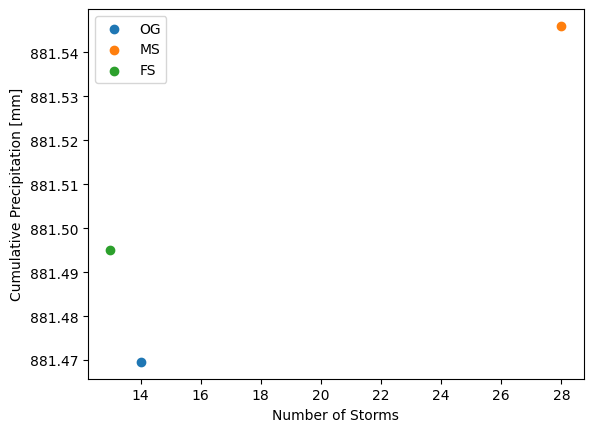

In [7]:
# want: total precip for a cluster-storm event
# set up dictionaries for yearly entries:

storms_all = {} # tracks all storm events (hourly)
storm_sti = {} # tracks all start indicies of storm clusters
storm_len = {} # contains number of storm hours in a clustered event (min = 1)
storm_rainfall = {} # contains rainfall data for each cluster-event

threshold = 4 # mm

for key in precipitation.keys():

    storms_all[key] = np.where(precipitation[key] > threshold)[0]
    storms = np.where(precipitation[key] > threshold)[0]
    
    storm_starts = []
    storm_lengths = []
    
    current_storm_start = storms[0]
    current_storm_length = 1
    
    for i in range(1, len(storms)):
        # check if the i is part of the current storm cluster
        if storms[i] == storms[i-1] + 1:
            current_storm_length += 1
        else:
            # if not part of the current storm cluster, add info to storm starts/lengths lists
            storm_starts.append(current_storm_start)
            storm_lengths.append(current_storm_length)
            # re-initialize storm starts
            current_storm_start = storms[i]
            current_storm_length = 1
            
    storm_sti[key] = storm_starts
    storm_len[key] = storm_lengths

    total_precipitation_per_storm = []
    
    # iterate through clusters
    for start, length in zip(storm_starts, storm_lengths):
        # calculate the end index of the cluster
        end = start + length
        # extract the precipitation data for the current storm
        precip = precipitation[key]
        storm_precipitation = precip[start:end]
        # sum the precipitation data for the current storm
        total_storm_precipitation = np.sum(storm_precipitation)
        # Append the total precipitation to the result array
        total_precipitation_per_storm.append(total_storm_precipitation)

    storm_rainfall[key] = np.array(total_precipitation_per_storm)

for key in precipitation.keys():
    print(key, len(storm_rainfall[key]))

for key in precipitation.keys():
    plt.scatter(len(storm_rainfall[key]), np.sum(precipitation[key]), label=key)
    
plt.legend()
plt.xlabel("Number of Storms")
plt.ylabel("Cumulative Precipitation [mm]")

### Examining Inflow Data

In [63]:
mean_flux = {}
ct_sub_zero = {}
min_flux = {}
extension = ["OG", "HP", "MS", "FS", "TLE", "THE", "SLR1", "SLR2", "SLR5"]

for ext in extension:
    mean_flux[f"{ext}"] = np.mean(plot_flux[f"{ext}"])
    ct_sub_zero[f"{ext}"] = np.count_nonzero(plot_flux[f"{ext}"] < 0)
    min_flux[f"{ext}"] = np.min(plot_flux[f"{ext}"])

# mean_flux
ct_sub_zero
# min_flux

{'OG': 0,
 'HP': 0,
 'MS': 0,
 'FS': 0,
 'TLE': 0,
 'THE': 0,
 'SLR1': 0,
 'SLR2': 123,
 'SLR5': 1291}

In [64]:
extension_inland = ["SLR2", "SLR5"]

slr2 = plot_flux["SLR2"]
i = 0
num_inflow = 0

print("\nSLR2\n")

while i < 7905:
    if slr2[i] < 0:
        j = i
        print(f"start index = {i}")
        ct = 0
        num_inflow = num_inflow + 1
        print(f"{num_inflow}th inflow occurrence")
        while j <= 8760:
            if slr2[j] < 0: 
                ct = ct + 1
                j = j + 1
            else: 
                i = j
                print(f"{ct} hours of inflow \n")
                break
    else: i = i + 1

print("\nSLR5\n")

slr5 = plot_flux["SLR5"]
i = 0
num_inflow = 0

while i < 7905:
    if slr5[i] < 0:
        j = i
        print(f"start index = {i}")
        ct = 0
        num_inflow = num_inflow + 1
        print(f"{num_inflow}th inflow occurrence")
        while j <= 8760:
            if slr5[j] < 0: 
                ct = ct + 1
                j = j + 1
            else: 
                i = j
                print(f"{ct} hours of inflow \n")
                break
    else: i = i + 1


SLR2

start index = 6212
1th inflow occurrence
105 hours of inflow 

start index = 6472
2th inflow occurrence
18 hours of inflow 


SLR5

start index = 1
1th inflow occurrence
53 hours of inflow 

start index = 5205
2th inflow occurrence
363 hours of inflow 

start index = 5807
3th inflow occurrence
9 hours of inflow 

start index = 5822
4th inflow occurrence
43 hours of inflow 

start index = 5896
5th inflow occurrence
616 hours of inflow 

start index = 6713
6th inflow occurrence
66 hours of inflow 



# The Fudge Folder

Running the model with multiple parameter forcings at once (i.e. "combo" runs). Saving flux locally as a csv.

# Combo Forcing Files

### FS and TLE

In [67]:
# load the forcing file for FS year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1994")
file = 'forcing1D_1994.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as 1985-OG
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 881.5/758.2

# we add TLE temp projections
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 1.5

base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/'
os.chdir(base + "combo_txts/combo_forcing")
# write to a file
forcing_df.to_csv('forcing1D_1985_FS_TLE.txt',sep=' ',header=None, index=False, index_label=False)

### FS and THE

In [68]:
# load the forcing file for FS year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1994")
file = 'forcing1D_1994.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as 1985-OG
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 881.5/758.2

# we add TLE temp projections
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 4

os.chdir(base + "/combo_txts/combo_forcing")
# write to a file
forcing_df.to_csv('forcing1D_1985_FS_THE.txt',sep=' ',header=None, index=False, index_label=False)

### MS and THE

In [69]:
# load the forcing file for MS year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_2002")
file = 'forcing1D_2002.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as 1985-OG
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 881.5/1408.8

# we add TLE temp projections
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 4

base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/'
os.chdir(base + "/combo_txts/combo_forcing")
# write to a file
forcing_df.to_csv('forcing1D_1985_MS_THE.txt',sep=' ',header=None, index=False, index_label=False)

### MS and TLE

In [70]:
# load the forcing file for MS year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_2002")
file = 'forcing1D_2002.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as 1985-OG
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 881.5/1408.8

# we add TLE temp projections
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 1.5

base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/'
os.chdir(base + "/combo_txts/combo_forcing")
# write to a file
forcing_df.to_csv('forcing1D_1985_MS_TLE.txt',sep=' ',header=None, index=False, index_label=False)

### HP and THE

In [14]:
# load the forcing file for OG year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1985")
file = 'forcing1D_1985.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as the HP year
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 1337/881.5

# we add TLE temp projections
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 4

base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/'
os.chdir(base + "/combo_txts/combo_forcing")
# write to a file
forcing_df.to_csv('forcing1D_1985_HP_THE.txt',sep=' ',header=None, index=False, index_label=False)

### HP and TLE

In [15]:
# load the forcing file for OG year
os.chdir("/home/lrgrant/ParFlow/Clements_2D/forcing/forcing_1985")
file = 'forcing1D_1985.txt'
forcing_df = pd.read_csv(file, sep=' ', header=None, engine='python')
# print(forcing_df.head())

# add PF-CLM variable names and units 
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# we scale the precipitation so that it is the same cumulative as the HP year
forcing_df['APCP [mm/s]'] = forcing_df['APCP [mm/s]'] * 1337/881.5

# we add TLE temp projections
forcing_df['Temp [K]'] = forcing_df['Temp [K]'] + 1.5

base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/'
os.chdir(base + "/combo_txts/combo_forcing")
# write to a file
forcing_df.to_csv('forcing1D_1985_HP_TLE.txt',sep=' ',header=None, index=False, index_label=False)

# SLR1

## SLR1 and TLE 

SLR1 and TLE gets run as a deepcopy of SLR1:

In [73]:
#-----------------------------------------------------------------------------
# Setting Initial Parameters
#-----------------------------------------------------------------------------

base = "/home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge"
os.chdir(base + "/../../../")
print(os.getcwd())

# Set our Run Name 
PFCLM_1985_f1 = Run("PFCLM_1985_f1")

stopt = 8760

#-----------------------------------------------------------------------------
# Copying Input Files into Run Directory
#-----------------------------------------------------------------------------

input_file_clmin = os.getcwd() + "/forcing/forcing_1985/drv_clmin.dat"
input_file_vegp = os.getcwd() + "/forcing/forcing_1985/drv_vegp.dat"
input_file_vegm = os.getcwd() + "/output/land_cover/new_clm_files/cropland_veg_mosaic/drv_vegm.dat"
input_file_pressIC = os.getcwd() + "/output/output_1985/SLR1/PF_PressIC.pfb"
# be sure to change to correct output folder
output_clmin = os.getcwd() + "/output/output_1985/fudge/drv_clmin.dat"
output_vegp = os.getcwd() + "/output/output_1985/fudge/drv_vegp.dat"
output_vegm = os.getcwd() + "/output/output_1985/fudge/drv_vegm.dat"
output_pressIC = os.getcwd() + "/output/output_1985/fudge/PF_PressIC.pfb"

# CLM Inputs
shutil.copyfile(input_file_clmin, output_clmin)
shutil.copyfile(input_file_vegp, output_vegp)
shutil.copyfile(input_file_vegm, output_vegm)
shutil.copyfile(input_file_pressIC, output_pressIC)

/home/lrgrant/ParFlow/Clements_2D


'/home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge/PF_PressIC.pfb'

In [74]:
#-----------------------------------------------------------------------------
# Copying SLR1 Run
#-----------------------------------------------------------------------------

os.chdir(base + "/../SLR1")
PFCLM_1985_SLR1 = Run.from_definition('PFCLM_1985_SLR1.pfidb')

#-----------------------------------------------------------------------------
# Renaming run
#-----------------------------------------------------------------------------

os.chdir(base)
PFCLM_1985_f1 = deepcopy(PFCLM_1985_SLR1)

#-----------------------------------------------------------------------------
# Pressure Initial Conditions
#-----------------------------------------------------------------------------

# reverting Pressure IC to Original Types/Values
PFCLM_1985_f1.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_1985_f1.ICPressure.GeomNames            = 'domain'
PFCLM_1985_f1.Geom.domain.ICPressure.Value    = -2.00  # pressure at 8760 step of previous run, same WY
PFCLM_1985_f1.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_1985_f1.Geom.domain.ICPressure.RefPatch = 'z_upper'

PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_TLE.txt'
PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../../../forcing/forcing_1985'

# # run model with new SLR condition
print(base)
PFCLM_1985_f1.run(working_directory=base)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_SLR1.pfidb
# ==============================================================================



/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)



# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [75]:
# re-initialize, re-run
os.chdir(base)
run = Run.from_definition('PFCLM_1985_SLR1.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nt = len(data.times)  # get the number of time steps
nx = data.shape[2]    # get the number of cells in the x direction
ny = data.shape[1]    # get the number of cells in the y direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dy = data.dy          # get the cell size in the y direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# loading grid, pressure field to re-initialize and re-run with good i.c.
nrows = nz
ncols = nx
# print(nrows, ncols)

# load pressure field for last time step
pressure_end = read_pfb(get_absolute_path('PFCLM_1985_SLR1.out.press.08760.pfb')).reshape(nrows, ncols)

# rearrange pressure field into a 3D array
pressure_end_new = np.ones((nrows, ny, ncols))
for i in range(nrows):
    pressure_end_new[[i]] = pressure_end[i,:]

# re-import write_pfb function so that the function runs and doesn't try to call boolean assigned before:
from parflow.tools.io import write_pfb

# write the new initial conditions into a file:
write_pfb(get_absolute_path('PF_PressIC.pfb'), pressure_end_new)

# we will change the "initial condition pressure" value to be the end value from the previous run
PFCLM_1985_f1.ICPressure.Type                 = 'PFBFile'
PFCLM_1985_f1.Geom.domain.ICPressure.FileName = 'PF_PressIC.pfb'

# we will now run the model again
PFCLM_1985_f1.run(working_directory=base)


# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_SLR1.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [76]:
# save flux as txt
os.chdir(base)
run = Run.from_definition('PFCLM_1985_SLR1.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nx = data.shape[2]    # get the number of cells in the x direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

os.chdir(base)
# load in the velocity files
# get a list of all the velocity files in order
Vx_files = sorted(glob("PFCLM_1985_SLR1.out.velx.*.pfb"))

# read in all velocity files into a 3D NParray
Vx_arrays = pf.read_pfb_sequence(Vx_files)

# select velocities at the coastal boundary
Vx = Vx_arrays[:,:,0,-1]

flux = (Vx*dz)   # per unit width
# print(flux.shape)

plot_flux = np.sum(flux, axis=1)
plot_flux = np.expand_dims(plot_flux, axis=1)
print(plot_flux.shape)

flux_out = pd.DataFrame(plot_flux)

os.chdir("/home/lrgrant/ParFlow/Clements_2D/output/output_1985/combo_txts")
flux_out.to_csv('SLR1_TLE_xflux.csv', sep = ' ', index=False, header=False)

(8761, 1)


## SLR1 and THE

Runs as a copy of SLR1 and TLE... named `PFCLM_1985_SLR1.pfidb` in the folder `/home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge`.

In [77]:
# copying in SLR1
os.chdir(base + "/../SLR1")
PFCLM_1985_SLR1 = Run.from_definition('PFCLM_1985_SLR1.pfidb')

os.chdir(base)
PFCLM_1985_f1 = deepcopy(PFCLM_1985_SLR1)

# reverting Pressure Initial Conditions to Original Types/Values
PFCLM_1985_f1.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_1985_f1.ICPressure.GeomNames            = 'domain'
PFCLM_1985_f1.Geom.domain.ICPressure.Value    = -2.00  # pressure at 8760 step of previous run, same WY
PFCLM_1985_f1.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_1985_f1.Geom.domain.ICPressure.RefPatch = 'z_upper'

PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_THE.txt'
PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../../../forcing/forcing_1985'

# # run model with new SLR condition
print(base)
PFCLM_1985_f1.run(working_directory=base)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
/home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_SLR1.pfidb
# ==============================================================================



/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)



# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [78]:
# re-initialize, re-run
os.chdir(base)
run = Run.from_definition('PFCLM_1985_SLR1.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nt = len(data.times)  # get the number of time steps
nx = data.shape[2]    # get the number of cells in the x direction
ny = data.shape[1]    # get the number of cells in the y direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dy = data.dy          # get the cell size in the y direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# loading grid, pressure field to re-initialize and re-run with good i.c.
nrows = nz
ncols = nx
# print(nrows, ncols)

# load pressure field for last time step
pressure_end = read_pfb(get_absolute_path('PFCLM_1985_SLR1.out.press.08760.pfb')).reshape(nrows, ncols)

# rearrange pressure field into a 3D array
pressure_end_new = np.ones((nrows, ny, ncols))
for i in range(nrows):
    pressure_end_new[[i]] = pressure_end[i,:]

# re-import write_pfb function so that the function runs and doesn't try to call boolean assigned before:
from parflow.tools.io import write_pfb

# write the new initial conditions into a file:
write_pfb(get_absolute_path('PF_PressIC.pfb'), pressure_end_new)

# we will change the "initial condition pressure" value to be the end value from the previous run
PFCLM_1985_f1.ICPressure.Type                 = 'PFBFile'
PFCLM_1985_f1.Geom.domain.ICPressure.FileName = 'PF_PressIC.pfb'

# we will now run the model again
PFCLM_1985_f1.run(working_directory=base)


# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_SLR1.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [79]:
# save flux as txt
os.chdir(base)
run = Run.from_definition('PFCLM_1985_SLR1.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nx = data.shape[2]    # get the number of cells in the x direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

os.chdir(base)
# load in the velocity files
# get a list of all the velocity files in order
Vx_files = sorted(glob("PFCLM_1985_SLR1.out.velx.*.pfb"))

# read in all velocity files into a 3D NParray
Vx_arrays = pf.read_pfb_sequence(Vx_files)

# select velocities at the coastal boundary
Vx = Vx_arrays[:,:,0,-1]

flux = (Vx*dz)   # per unit width
# print(flux.shape)

plot_flux = np.sum(flux, axis=1)
plot_flux = np.expand_dims(plot_flux, axis=1)
print(plot_flux.shape)

flux_out = pd.DataFrame(plot_flux)

os.chdir("/home/lrgrant/ParFlow/Clements_2D/output/output_1985/combo_txts")
flux_out.to_csv('SLR1_THE_xflux.csv', sep = ' ', index=False, header=False)

(8761, 1)


## SLR1 and FS

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_FS.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../FS'` <br/>

## SLR1 and MS

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_MS.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../MS'` <br/>

## SLR1 and HP

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_HP.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../HP'` <br/>

## SLR1 and FS and TLE

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_FS_TLE.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'` <br/>

## SLR1 and FS and THE

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_FS_THE.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'` <br/>

## SLR1 and MS and THE

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_MS_THE.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'` <br/>

## SLR1 and MS and TLE

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_MS_TLE.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'` <br/>

## SLR1 and HP and THE

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_HP_THE.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'` <br/>

## SLR1 and HP and TLE

Runs as above, with the run alterations:
> `PFCLM_1985_f1.Solver.CLM.MetFileName = 'forcing1D_1985_HP_TLE.txt'` <br/>
> `PFCLM_1985_f1.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'` <br/>

# SLR2

Runs as SLR1 combo-runs. All runs are alterations of `PFCLM_1985_SLR2.pfidb`. The following runs were completed:
> SLR2 & TLE <br/>
> SLR2 & THE <br/>
> SLR2 & FS <br/>
> SLR2 & MS <br/>
> SLR2 & HP <br/>
> SLR2 & FS & THE <br/>
> SLR2 & FS & TLE <br/>
> SLR2 & MS & THE <br/>
> SLR2 & MS & TLE <br/>
> SLR2 & HP & THE <br/>
> SLR2 & HP & TLE <br/>

# SLR5

Runs as SLR1 combo-runs. All runs are alterations of `PFCLM_1985_SLR5.pfidb`. The following runs were completed:
> SLR5 & TLE <br/>
> SLR5 & THE <br/>
> SLR5 & FS <br/>
> SLR5 & MS <br/>
> SLR5 & HP <br/>
> SLR5 & FS & THE <br/>
> SLR5 & FS & TLE <br/>
> SLR5 & MS & THE <br/>
> SLR5 & MS & TLE <br/>
> SLR5 & HP & THE <br/>
> SLR5 & HP & TLE <br/>

# No SLR

Starts with a new run in the `FS and TLE` section with the same parameters as `OG` (though named `PFCLM_1985_f` for this section). We then apply different forcing files to the `PFCLM_1985_f` run and save flux outputs.

## FS and TLE

In [175]:
#-----------------------------------------------------------------------------
# Set Run Parameters
#-----------------------------------------------------------------------------
base = '/home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge'

# Set our Run Name 
PFCLM_1985_f = Run("PFCLM_1985_f")


stopt = 8760
## run only for 24 hours for the water balance example
#stopt = 24

os.chdir(base)
#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
PFCLM_1985_f.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

PFCLM_1985_f.Process.Topology.P = 1
PFCLM_1985_f.Process.Topology.Q = 1
PFCLM_1985_f.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
PFCLM_1985_f.ComputationalGrid.Lower.X = 0.0
PFCLM_1985_f.ComputationalGrid.Lower.Y = 0.0
PFCLM_1985_f.ComputationalGrid.Lower.Z = 0.0

PFCLM_1985_f.ComputationalGrid.DX      = 100.0
PFCLM_1985_f.ComputationalGrid.DY      = 2.0
PFCLM_1985_f.ComputationalGrid.DZ      = 1.0

PFCLM_1985_f.ComputationalGrid.NX      = 20
PFCLM_1985_f.ComputationalGrid.NY      = 1
PFCLM_1985_f.ComputationalGrid.NZ      = 8

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
PFCLM_1985_f.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
PFCLM_1985_f.GeomInput.domain_input.InputType = 'Box'
PFCLM_1985_f.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
PFCLM_1985_f.Geom.domain.Lower.X = 0.0
PFCLM_1985_f.Geom.domain.Lower.Y = 0.0
PFCLM_1985_f.Geom.domain.Lower.Z = 0.0

PFCLM_1985_f.Geom.domain.Upper.X = 2000.0
PFCLM_1985_f.Geom.domain.Upper.Y = 2.0
PFCLM_1985_f.Geom.domain.Upper.Z = 8.0

PFCLM_1985_f.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

PFCLM_1985_f.Solver.Nonlinear.VariableDz = True
PFCLM_1985_f.dzScale.GeomNames           = 'domain'
PFCLM_1985_f.dzScale.Type                = 'nzList'
PFCLM_1985_f.dzScale.nzListNumber        = 8

# cells start at the bottom (0) and moves up to the top
# domain is 75 m thick, root zone is down to 4 cells 
# so the root zone is 2 m thick   
PFCLM_1985_f.Cell._0.dzScale.Value  = 18.0   
PFCLM_1985_f.Cell._1.dzScale.Value  = 24.0
PFCLM_1985_f.Cell._2.dzScale.Value  = 30.0
PFCLM_1985_f.Cell._3.dzScale.Value  = 1.0    
PFCLM_1985_f.Cell._4.dzScale.Value  = 1.0   # top of rooting zone - leaving unchanged
PFCLM_1985_f.Cell._5.dzScale.Value  = 0.6   #0.6* 1.0 = 0.6  60 cm 3rd layer
PFCLM_1985_f.Cell._6.dzScale.Value  = 0.3   #0.3* 1.0 = 0.3  30 cm 2nd layer
PFCLM_1985_f.Cell._7.dzScale.Value  = 0.1   #0.1* 1.0 = 0.1  10 cm top layer

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
PFCLM_1985_f.Geom.Perm.Names              = 'domain'

PFCLM_1985_f.Geom.domain.Perm.Type        = 'Constant'
PFCLM_1985_f.Geom.domain.Perm.Value       = 0.2  # m/h

PFCLM_1985_f.Perm.TensorType              = 'TensorByGeom'
PFCLM_1985_f.Geom.Perm.TensorByGeom.Names = 'domain'
PFCLM_1985_f.Geom.domain.Perm.TensorValX  = 1.0
PFCLM_1985_f.Geom.domain.Perm.TensorValY  = 1.0
PFCLM_1985_f.Geom.domain.Perm.TensorValZ  = 1.0


#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

PFCLM_1985_f.SpecificStorage.Type              = 'Constant'
PFCLM_1985_f.SpecificStorage.GeomNames         = 'domain'
PFCLM_1985_f.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

PFCLM_1985_f.Phase.Names = 'water'

PFCLM_1985_f.Phase.water.Density.Type     = 'Constant'
PFCLM_1985_f.Phase.water.Density.Value    = 1.0

PFCLM_1985_f.Phase.water.Viscosity.Type   = 'Constant'
PFCLM_1985_f.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
PFCLM_1985_f.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

PFCLM_1985_f.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

PFCLM_1985_f.TimingInfo.BaseUnit     = 1.0
PFCLM_1985_f.TimingInfo.StartCount   = 0
PFCLM_1985_f.TimingInfo.StartTime    = 0.0
PFCLM_1985_f.TimingInfo.StopTime     = stopt
PFCLM_1985_f.TimingInfo.DumpInterval = 1.0
PFCLM_1985_f.TimeStep.Type           = 'Constant'
PFCLM_1985_f.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

PFCLM_1985_f.Geom.Porosity.GeomNames    = 'domain'

PFCLM_1985_f.Geom.domain.Porosity.Type  = 'Constant'
PFCLM_1985_f.Geom.domain.Porosity.Value = 0.25

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
PFCLM_1985_f.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
PFCLM_1985_f.Phase.water.Mobility.Type  = 'Constant'
PFCLM_1985_f.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

PFCLM_1985_f.Phase.RelPerm.Type        = 'VanGenuchten'
PFCLM_1985_f.Phase.RelPerm.GeomNames   = 'domain'

PFCLM_1985_f.Geom.domain.RelPerm.Alpha = 2.0
PFCLM_1985_f.Geom.domain.RelPerm.N     = 3.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

PFCLM_1985_f.Phase.Saturation.Type        = 'VanGenuchten'
PFCLM_1985_f.Phase.Saturation.GeomNames   = 'domain'

PFCLM_1985_f.Geom.domain.Saturation.Alpha = 2.0
PFCLM_1985_f.Geom.domain.Saturation.N     = 3.0
PFCLM_1985_f.Geom.domain.Saturation.SRes  = 0.2
PFCLM_1985_f.Geom.domain.Saturation.SSat  = 1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
PFCLM_1985_f.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
PFCLM_1985_f.Cycle.Names = 'constant'
PFCLM_1985_f.Cycle.constant.Names = 'alltime'
PFCLM_1985_f.Cycle.constant.alltime.Length = 1
PFCLM_1985_f.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
PFCLM_1985_f.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

PFCLM_1985_f.Patch.y_lower.BCPressure.Type          = 'FluxConst'
PFCLM_1985_f.Patch.y_lower.BCPressure.Cycle         = 'constant'
PFCLM_1985_f.Patch.y_lower.BCPressure.alltime.Value = 0.0

PFCLM_1985_f.Patch.z_lower.BCPressure.Type = 'FluxConst'
PFCLM_1985_f.Patch.z_lower.BCPressure.Cycle         = 'constant'
PFCLM_1985_f.Patch.z_lower.BCPressure.alltime.Value = 0.0

PFCLM_1985_f.Patch.x_lower.BCPressure.Type          = 'FluxConst'
PFCLM_1985_f.Patch.x_lower.BCPressure.Cycle         = 'constant'
PFCLM_1985_f.Patch.x_lower.BCPressure.alltime.Value = 0.0

PFCLM_1985_f.Patch.x_upper.BCPressure.Type          = 'DirEquilRefPatch'
PFCLM_1985_f.Patch.x_upper.BCPressure.RefGeom       = 'domain'
PFCLM_1985_f.Patch.x_upper.BCPressure.RefPatch      = 'z_upper'
PFCLM_1985_f.Patch.x_upper.BCPressure.Cycle         = 'constant'
PFCLM_1985_f.Patch.x_upper.BCPressure.alltime.Value = -2.0  # ocean boundary is 2m below land surface

PFCLM_1985_f.Patch.y_upper.BCPressure.Type          = 'FluxConst'
PFCLM_1985_f.Patch.y_upper.BCPressure.Cycle         = 'constant'
PFCLM_1985_f.Patch.y_upper.BCPressure.alltime.Value = 0.0

PFCLM_1985_f.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
PFCLM_1985_f.Patch.z_upper.BCPressure.Cycle         = 'constant'
PFCLM_1985_f.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

PFCLM_1985_f.TopoSlopesX.Type              = 'Constant'
PFCLM_1985_f.TopoSlopesX.GeomNames         = 'domain'
PFCLM_1985_f.TopoSlopesX.Geom.domain.Value = -0.1  #slope in X-direction to allow ponded water to run off

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

PFCLM_1985_f.TopoSlopesY.Type              = 'Constant'
PFCLM_1985_f.TopoSlopesY.GeomNames         = 'domain'
PFCLM_1985_f.TopoSlopesY.Geom.domain.Value = 0.0

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

PFCLM_1985_f.Mannings.Type               = 'Constant'
PFCLM_1985_f.Mannings.GeomNames          = 'domain'
PFCLM_1985_f.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

PFCLM_1985_f.PhaseSources.water.Type              = 'Constant'
PFCLM_1985_f.PhaseSources.water.GeomNames         = 'domain'
PFCLM_1985_f.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

PFCLM_1985_f.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

PFCLM_1985_f.Solver         = 'Richards'
PFCLM_1985_f.Solver.MaxIter = 9000

PFCLM_1985_f.Solver.Nonlinear.MaxIter           = 100
PFCLM_1985_f.Solver.Nonlinear.ResidualTol       = 1e-5
PFCLM_1985_f.Solver.Nonlinear.EtaChoice         = 'Walker1'
PFCLM_1985_f.Solver.Nonlinear.EtaValue          = 0.01
PFCLM_1985_f.Solver.Nonlinear.UseJacobian       = True
PFCLM_1985_f.Solver.Nonlinear.DerivativeEpsilon = 1e-12
PFCLM_1985_f.Solver.Nonlinear.StepTol           = 1e-30
PFCLM_1985_f.Solver.Nonlinear.Globalization     = 'LineSearch'
PFCLM_1985_f.Solver.Linear.KrylovDimension      = 100
PFCLM_1985_f.Solver.Linear.MaxRestarts          = 5
PFCLM_1985_f.Solver.Linear.Preconditioner       = 'PFMG'
PFCLM_1985_f.Solver.PrintSubsurf                = True
PFCLM_1985_f.Solver.Drop                        = 1E-20
PFCLM_1985_f.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True  #only PFB output for water balance example
#  PFB  no SILO
PFCLM_1985_f.Solver.PrintSubsurfData         = write_pfb
PFCLM_1985_f.Solver.PrintPressure            = write_pfb
PFCLM_1985_f.Solver.PrintSaturation          = write_pfb
PFCLM_1985_f.Solver.PrintCLM                 = write_pfb
PFCLM_1985_f.Solver.PrintMask                = write_pfb
PFCLM_1985_f.Solver.PrintSpecificStorage     = write_pfb
PFCLM_1985_f.Solver.PrintEvapTrans           = write_pfb
PFCLM_1985_f.Solver.PrintVelocities          = True 

PFCLM_1985_f.Solver.WriteSiloMannings        = False
PFCLM_1985_f.Solver.WriteSiloMask            = False
PFCLM_1985_f.Solver.WriteSiloSlopes          = False
PFCLM_1985_f.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#PFCLM_2D.NetCDF.NumStepsPerFile          = 240
PFCLM_1985_f.NetCDF.WritePressure            = write_netcdf
PFCLM_1985_f.NetCDF.WriteSubsurface          = False
PFCLM_1985_f.NetCDF.WriteSaturation          = write_netcdf
PFCLM_1985_f.NetCDF.WriteCLM                 = write_netcdf
#PFCLM_2D.NetCDF.CLMNumStepsPerFile       = 240


#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
PFCLM_1985_f.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
PFCLM_1985_f.Solver.CLM.MetForcing   = '1D'
PFCLM_1985_f.Solver.CLM.MetFileName = 'forcing1D_1985_FS_TLE.txt'
PFCLM_1985_f.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'

# Set CLM Plant Water Use Parameters
PFCLM_1985_f.Solver.CLM.EvapBeta       = 'Linear'
PFCLM_1985_f.Solver.CLM.VegWaterStress = 'Saturation'
PFCLM_1985_f.Solver.CLM.ResSat         = 0.2
PFCLM_1985_f.Solver.CLM.WiltingPoint   = 0.2
PFCLM_1985_f.Solver.CLM.FieldCapacity  = 1.00
PFCLM_1985_f.Solver.CLM.IrrigationType = 'none'
PFCLM_1985_f.Solver.CLM.RootZoneNZ     =  3   # layer used for seasonal Temp for LAI
PFCLM_1985_f.Solver.CLM.SoiLayer       =  4   # root zone thickness, see above

#PFCLM_2D.Solver.CLM.UseSlopeAspect = True

#Writing output options for CLM
#  no SILO, no native CLM logs
PFCLM_1985_f.Solver.PrintLSMSink        = False
PFCLM_1985_f.Solver.CLM.CLMDumpInterval = 1
PFCLM_1985_f.Solver.CLM.CLMFileDir      = 'output/'
PFCLM_1985_f.Solver.CLM.BinaryOutDir    = False
PFCLM_1985_f.Solver.CLM.IstepStart      = 1
PFCLM_1985_f.Solver.WriteCLMBinary      = False
PFCLM_1985_f.Solver.WriteSiloCLM        = False
PFCLM_1985_f.Solver.CLM.WriteLogs       = False
PFCLM_1985_f.Solver.CLM.WriteLastRST    = True
PFCLM_1985_f.Solver.CLM.DailyRST        = False
PFCLM_1985_f.Solver.CLM.SingleFile      = True


#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

PFCLM_1985_f.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_1985_f.ICPressure.GeomNames            = 'domain'
PFCLM_1985_f.Geom.domain.ICPressure.Value    = -2.00  # pressure at 8760 step of previous run, same WY
PFCLM_1985_f.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_1985_f.Geom.domain.ICPressure.RefPatch = 'z_upper'

In [176]:
# run
PFCLM_1985_f.run(working_directory = base)


# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_f.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [177]:
# re-initialize, re-run
os.chdir(base)
run = Run.from_definition('PFCLM_1985_f.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nt = len(data.times)  # get the number of time steps
nx = data.shape[2]    # get the number of cells in the x direction
ny = data.shape[1]    # get the number of cells in the y direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dy = data.dy          # get the cell size in the y direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# loading grid, pressure field to re-initialize and re-run with good i.c.
nrows = nz
ncols = nx
# print(nrows, ncols)

# load pressure field for last time step
pressure_end = read_pfb(get_absolute_path('PFCLM_1985_f.out.press.08760.pfb')).reshape(nrows, ncols)

# rearrange pressure field into a 3D array
pressure_end_new = np.ones((nrows, ny, ncols))
for i in range(nrows):
    pressure_end_new[[i]] = pressure_end[i,:]

# re-import write_pfb function so that the function runs and doesn't try to call boolean assigned before:
from parflow.tools.io import write_pfb

# write the new initial conditions into a file:
write_pfb(get_absolute_path('PF_PressIC.pfb'), pressure_end_new)

# we will change the "initial condition pressure" value to be the end value from the previous run
PFCLM_1985_f.ICPressure.Type                 = 'PFBFile'
PFCLM_1985_f.Geom.domain.ICPressure.FileName = 'PF_PressIC.pfb'

# we will now run the model again
PFCLM_1985_f.run(working_directory=base)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_f.pfidb
# ==============================================================================




/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [178]:
# save flux as txt
os.chdir(base)
run = Run.from_definition('PFCLM_1985_f.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nx = data.shape[2]    # get the number of cells in the x direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# load in the velocity files
# get a list of all the velocity files in order
Vx_files = sorted(glob("PFCLM_1985_f.out.velx.*.pfb"))

# read in all velocity files into a 3D NParray
Vx_arrays = pf.read_pfb_sequence(Vx_files)

# select velocities at the coastal boundary
Vx = Vx_arrays[:,:,0,-1]

flux = (Vx*dz)   # per unit width
# print(flux.shape)

# move into df
plot_flux = np.sum(flux, axis=1)
plot_flux = np.expand_dims(plot_flux, axis=1)
print(plot_flux.shape)
flux_out = pd.DataFrame(plot_flux)

# save as csv
os.chdir("/home/lrgrant/ParFlow/Clements_2D/output/output_1985/combo_txts")
flux_out.to_csv('FS_TLE_xflux.csv', sep = ' ', index=False, header=False)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


(8761, 1)


## FS and THE

Runs by copying `FS and TLE`, and altering forcing file.

In [179]:
os.chdir(base)
# load run from above
PFCLM_1985_f = Run.from_definition('PFCLM_1985_f.pfidb')

# change forcing file
PFCLM_1985_f.Solver.CLM.MetFileName = 'forcing1D_1985_FS_THE.txt'
PFCLM_1985_f.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'

# run
PFCLM_1985_f.run(working_directory = base)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_f.pfidb
# ==============================================================================



/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)



# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [180]:
# re-initialize, re-run
os.chdir(base)
run = Run.from_definition('PFCLM_1985_f.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nt = len(data.times)  # get the number of time steps
nx = data.shape[2]    # get the number of cells in the x direction
ny = data.shape[1]    # get the number of cells in the y direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dy = data.dy          # get the cell size in the y direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# loading grid, pressure field to re-initialize and re-run with good i.c.
nrows = nz
ncols = nx
# print(nrows, ncols)

# load pressure field for last time step
pressure_end = read_pfb(get_absolute_path('PFCLM_1985_f.out.press.08760.pfb')).reshape(nrows, ncols)

# rearrange pressure field into a 3D array
pressure_end_new = np.ones((nrows, ny, ncols))
for i in range(nrows):
    pressure_end_new[[i]] = pressure_end[i,:]

# re-import write_pfb function so that the function runs and doesn't try to call boolean assigned before:
from parflow.tools.io import write_pfb

# write the new initial conditions into a file:
write_pfb(get_absolute_path('PF_PressIC.pfb'), pressure_end_new)

# we will change the "initial condition pressure" value to be the end value from the previous run
PFCLM_1985_f.ICPressure.Type                 = 'PFBFile'
PFCLM_1985_f.Geom.domain.ICPressure.FileName = 'PF_PressIC.pfb'

# we will now run the model again
PFCLM_1985_f.run(working_directory=base)


# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/lrgrant/ParFlow/Clements_2D/output/output_1985/fudge
# ParFlow database
#  - PFCLM_1985_f.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [181]:
# save flux as txt
os.chdir(base)
run = Run.from_definition('PFCLM_1985_f.pfidb')  # load the run from the file, this is the same as the run above
data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
nx = data.shape[2]    # get the number of cells in the x direction
nz = data.shape[0]    # get the number of cells in the z direction
dx = data.dx          # get the cell size in the x direction
dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

# load in the velocity files
# get a list of all the velocity files in order
Vx_files = sorted(glob("PFCLM_1985_f.out.velx.*.pfb"))

# read in all velocity files into a 3D NParray
Vx_arrays = pf.read_pfb_sequence(Vx_files)

# select velocities at the coastal boundary
Vx = Vx_arrays[:,:,0,-1]

flux = (Vx*dz)   # per unit width
# print(flux.shape)

plot_flux = np.sum(flux, axis=1)
plot_flux = np.expand_dims(plot_flux, axis=1)
print(plot_flux.shape)
flux_out = pd.DataFrame(plot_flux)

os.chdir("/home/lrgrant/ParFlow/Clements_2D/output/output_1985/combo_txts")
flux_out.to_csv('FS_THE_xflux.csv', sep = ' ', index=False, header=False)

(8761, 1)


## MS and TLE

Runs as above, with the following parameter alterations:
> `PFCLM_1985_f.Solver.CLM.MetFileName = 'forcing1D_1985_MS_TLE.txt'` <br/>
> `PFCLM_1985_f.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'`

## MS and THE

Runs as above, with the following parameter alterations:
> `PFCLM_1985_f.Solver.CLM.MetFileName = 'forcing1D_1985_MS_THE.txt'` <br/>
> `PFCLM_1985_f.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'`

## HP and TLE

Runs as above, with the following parameter alterations:
> `PFCLM_1985_f.Solver.CLM.MetFileName = 'forcing1D_1985_HP_TLE.txt'` <br/>
> `PFCLM_1985_f.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'`

## HP and THE

Runs as above, with the following parameter alterations:
> `PFCLM_1985_f.Solver.CLM.MetFileName = 'forcing1D_1985_HP_THE.txt'` <br/>
> `PFCLM_1985_f.Solver.CLM.MetFilePath  = os.getcwd() + '/../combo_txts/combo_forcing'`